📌 Visualização inicial dos dados:


,nome_centro_distribuicao,codigo_produto,total_entrada,total_saida
0,CD Blumenau,P1005,3544,4268
1,CD Blumenau,P1002,3300,3483
2,CD Blumenau,P1003,3721,3380
3,CD Blumenau,P1004,2516,3046
4,CD Blumenau,P1006,2637,2324



📊 Estatísticas


,total_entrada
count,60.000000
mean,2967.266667
std,838.941501
min,1135.000000
25%,2502.500000
50%,2887.500000
75%,3527.500000
max,6014.000000



📊 Estatísticas


,total_saida
count,60.000000
mean,2994.283333
std,860.625257
min,993.000000
25%,2336.750000
50%,2911.500000
75%,3597.500000
max,5602.000000


,nome_centro_distribuicao,codigo_produto,total_entrada,total_saida,movimentacao_liquida
0,CD Blumenau,P1005,3544,4268,-724
1,CD Blumenau,P1002,3300,3483,-183
2,CD Blumenau,P1003,3721,3380,341
3,CD Blumenau,P1004,2516,3046,-530
4,CD Blumenau,P1006,2637,2324,313


📊 Estatísticas da saida:
Média: 2994.28
Variância: 728331.24
Desvio padrão: 853.42
📌 rank


,nome_centro_distribuicao,total_saida
3,CD Florianópolis,21002
7,CD Lages,20086
5,CD Jaraguá do Sul,19436
0,CD Blumenau,18417
6,CD Joinville,18406
8,CD São José,18199
4,CD Itajaí,17498
2,CD Criciúma,17185
1,CD Chapecó,15253
9,CD Tubarão,14175


📌 Visualização graficos


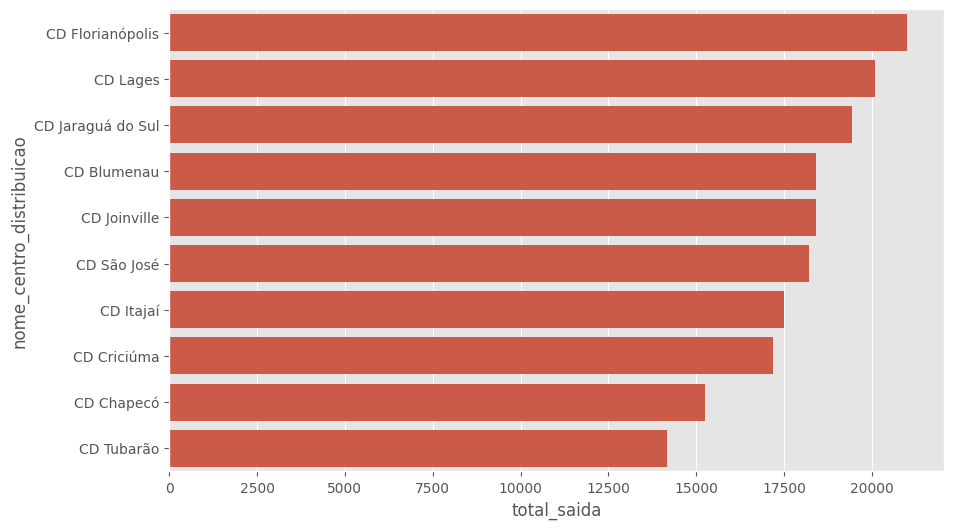

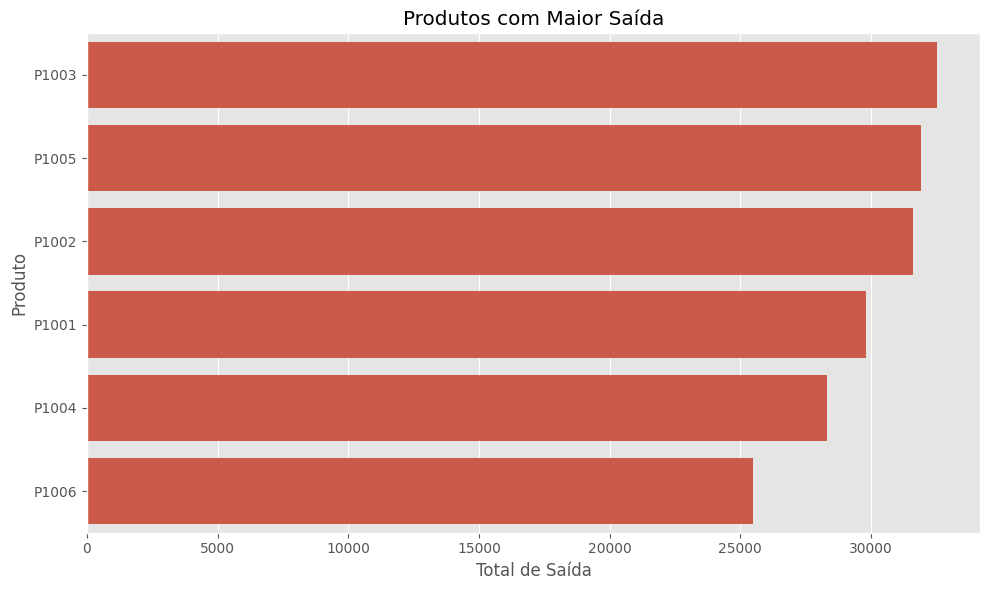

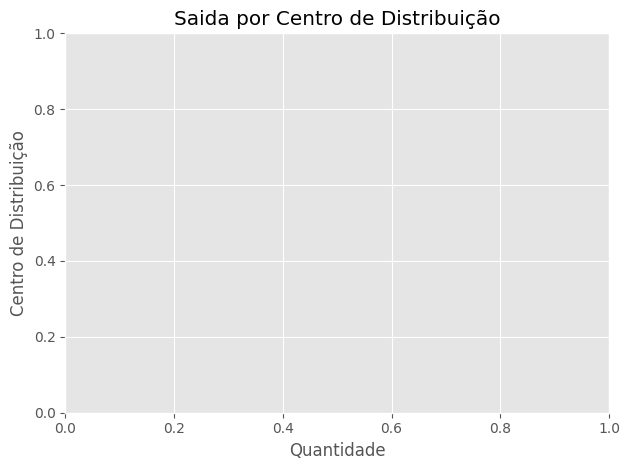

📌 Visualização inicial dos dados:


,nome_centro_distribuicao,capacidade_armazenagem,estoque_calculado
0,CD Tubarão,3600,1877
1,CD Itajaí,5200,449
2,CD Jaraguá do Sul,4100,217
3,CD São José,3900,130
4,CD Chapecó,4600,-160



📊 Estatísticas


,capacidade_armazenagem
count,10.000000
mean,4140.000000
std,655.235327
min,3000.000000
25%,3825.000000
50%,4050.000000
75%,4500.000000
max,5200.000000



📊 Estatísticas


,estoque_calculado
count,10.000000
mean,-162.100000
std,968.439116
min,-1783.000000
25%,-685.000000
50%,-229.500000
75%,195.250000
max,1877.000000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

df = pd.read_csv("consulta_produto.csv", sep=";")
df2=pd.read_csv("consulta2.csv", sep=";")
# Visualizar as primeiras linhas
print("📌 Visualização inicial dos dados:")
display(df.head())
print("\n📊 Estatísticas")
display(df['total_entrada'].describe())
#['']['']
print("\n📊 Estatísticas")
display(df['total_saida'].describe())
df['movimentacao_liquida'] = df['total_entrada'] - df['total_saida']

display(df.head())

mov = df['total_saida'].values

media = np.mean(mov)
variancia = np.var(mov)
desvio = np.std(mov)


print("📊 Estatísticas da saida:")
print(f"Média: {media:.2f}")
print(f"Variância: {variancia:.2f}")
print(f"Desvio padrão: {desvio:.2f}")

print("📌 rank")
ranking_centros = (
    df.groupby('nome_centro_distribuicao')['total_saida']
    .sum()
    .reset_index()
    .sort_values(by='total_saida', ascending=False)
)

display(ranking_centros)

print("📌 Visualização graficos")
plt.figure(figsize=(10,6))
sns.barplot(
    data=ranking_centros,
    x='total_saida',
    y='nome_centro_distribuicao'
)
produto_saida = (
    df.groupby('codigo_produto')['total_saida']
    .sum()
    .reset_index()
    .sort_values(by='total_saida', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=produto_saida,
    x='total_saida',
    y='codigo_produto'
)

plt.title("Produtos com Maior Saída")
plt.xlabel("Total de Saída")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()


plt.title("Saida por Centro de Distribuição")
plt.xlabel("Quantidade")
plt.ylabel("Centro de Distribuição")
plt.tight_layout()
plt.show()


print("📌 Visualização inicial dos dados:")
display(df2.head())
print("\n📊 Estatísticas")
display(df2['capacidade_armazenagem'].describe())

print("\n📊 Estatísticas")
display(df2['estoque_calculado'].describe())

print("📌 rank")
ranking_centros = (
    df2.groupby('nome_centro_distribuicao')['estoque_calculado']
    .sum()
    .reset_index()
    .sort_values(by='estoque_calculado', ascending=False)
)

display(ranking_centros)

print("📌 Visualização graficos")
plt.figure(figsize=(10,6))
sns.barplot(
    data=ranking_centros,
    x='estoque_disponivel',
    y='nome_centro_distribuicao'
)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')